# Support Vector Machines, a Gentle Introduction

In a classification problem we want to classify or label a new observation, having trained our model with a set of observations whose class is known. One approach is to think that all elements that belong to the same class are *similar* in some way. We thus need a concept of similarity or *distance*.

For example, if we had a box of apples and we wanted to classify based on color, we would like our model to take the apples as input, the new observation being taking an apple from the box and checking its color, and give us its label as output. For example, **1** could be *red apple*, and **0** could be *green apple*. We then have two classes, 1 and 0. Some apples though, are not entirely red or green, and it's hard to say if they should be labeled 1 or 0. Here's where the concept of distance comes to help. Simply speaking, if the apple is sufficiently green, or more green than red, our model should label it as 0.

How does the model know what's green or red to begin with? We need to train our model on apples we know for sure are red or green. Applying the concept of distance to a new apple that we pick from the box, we can compare the new apple with the previously observed green and red apples.

## Kernels

In general, rather than apples we have objects mathcal{x}, belonging to a space $\mathcal{X}$. Our concept of similarity is embodied by a function $\mathcal{X}\times\mathcal{X}\rightarrow\mathbb{R}$ that we call Kernel Function. It is a measure of the distance between $x$ and $y$. It is natural to choose a kernel that is symmetric ( $κ(x,y)=κ(y,x)κ(x,y)=κ(y,x)$ ), that is, the similarity or distance between $x$ and $y$ is the same as the distance between $y$  and $x$, and non-negative ( $κ(x,y)\geq 0$ ), but it doesn't need be.

Two popular choices are the Gaussian kernel,

$\kappa(x,x′)=exp\bigg(−\dfrac{1}{2}(x−x′)^T\,\Sigma^{−1}\,(x−x′)\bigg)$,

and the squared exponential, radial basis function (RBF),

$\kappa(x,x′)=exp\bigg(−\dfrac{\|x−x′\|}2{\sigma^2}\bigg)$.

Of course there are many different kernels for different uses. Another choice worth mentioning is the Matern Kernel.
Notice in the last formula how the parameter $\sigma$  influences the smoothness of the kernel. In other words, $\sigma$ controls how far away points "influence" our current point. if it is large, we allow points far away from the current point to be "taken into account" (correlate). If it is is small, only points close to the current point will count.


Let's make an example where we draw samples from a gaussian process with the squared exponential kernel. Don't worry about the gaussian process part for now. In the first picture $\sigma=5$ an in the second  $\sigma=2$ . The difference in the smoothness of the curves is clear.

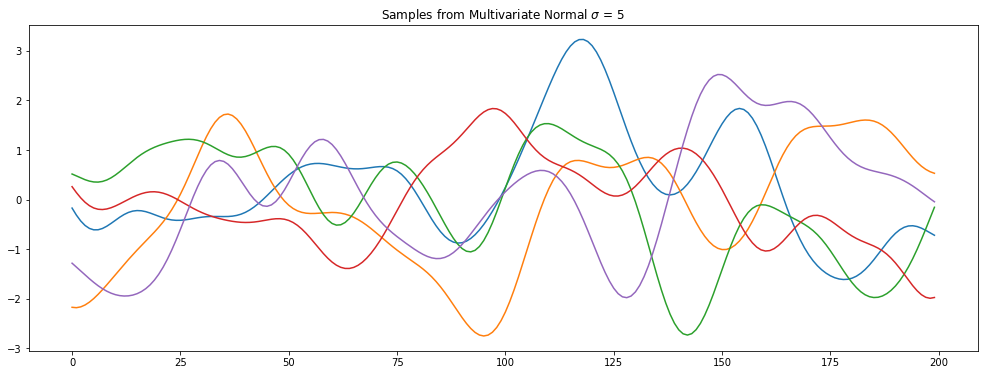

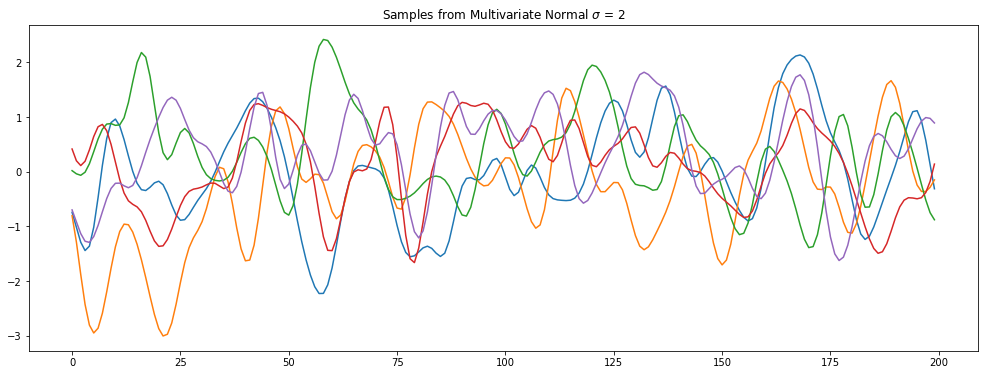

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


sample_size = 200
x_test = np.linspace(-50, 50, sample_size)


def _kernel_fun(x, y, s):
    """ Computes the kernel function for two points x and y. """
    return np.exp(-(1.0 / (2 * s ** 2)) * abs(x - y) ** 2)


def kernel_matrix(x1, x2, s):
    """ Computes the kernel matrix. It's symmetric. """
    h = 0
    K = np.empty((sample_size, sample_size))
    for j in xrange(sample_size):  # fill the j-th column
        for i in xrange(0, sample_size):
            K[i][j] = _kernel_fun(x1[i], x2[j], s)
        h = h + 1
    triu = np.triu_indices(4)
    K[triu] = K.T[triu]
    return K


K5 = kernel_matrix(np.asarray(x_test), np.asarray(x_test), 5)  # high sigma (=5), smoother functions
K2 = kernel_matrix(np.asarray(x_test), np.asarray(x_test), 2)  # low sigma (=2), not so smooth

# Sample from the multivariate normal process with mean zero and cov=K
gauss_samples5 = np.random.multivariate_normal(np.zeros((sample_size, 1)).ravel(), K5, size=5)
gauss_samples2 = np.random.multivariate_normal(np.zeros((sample_size, 1)).ravel(), K2, size=5)

plt.figure(figsize=(17,6))
plt.plot(gauss_samples5.T)
plt.title("Samples from Multivariate Normal $\sigma$ = 5")
plt.show()
plt.figure(figsize=(17,6))
plt.plot(gauss_samples2.T)
plt.title("Samples from Multivariate Normal $\sigma$ = 2")
plt.show()

## A Few Mathematical Details
There is plenty of material on books and internet about the background theory. I'm just giving a hint to fix some concepts, after all, this is a gentle introduction. *Feel  free to skip this section* if you're more example oriented. Those really intrested in (the very intresting) theory can check the literature. I recommend the book written by <a target="_blank" href='http://www.cs.ubc.ca/~murphyk/MLbook/index.html'>Kevin P. Murphy</a>.

### Reproducing Kernel Hilbert Space

Let's consider a bounded functional over the Hilbert space $H$ of functions $f$, that is,  $\mathcal{L}_x:f \rightarrow f(x)$. In practice $\mathcal{T}$ evaluates the function at point $x$. If the evaluation is bounded, then $\mathcal{H}$ is a reproducing kernel Hilbert space (RKHS) by definition. Thanks to Riesz theorem , such functional can be represented in a unique way, that is, $\forall f \in \mathcal{H}$ there is a unique $\kappa_x \in \mathcal{H}$ such that  $\mathcal{L}[f]=\langle f,\kappa_x\rangle_H=f(x)$, where the brackets represent the inner product in $\mathcal{H}$. Such $\kappa_x$ is the **reproducing kernel** of the Hilbert space $\mathcal{H}$. It is called reproducing kernel because of the property of "reproducing" $f$ evaluated at $x$.

Here we are really exploiting the power of Reisz theorem which allows us to reproduce "$f$ evaluated at $x$, $f(x)$", with a unique "rule" (or in a unique way), that is, which is an inner product. TO make a step further we can say that the RKHS is the closure of $\mathcal{H}$ in the norm induced by such inner product.

As mentioned above,  $\kappa_x \in \mathcal{H}$ for $x \in \mathcal{X}$. If we take $f=\kappa_y \in \mathcal{H}$ we can write

$$ \kappa_y(x)=⟨\kappa_x,\kappa_y⟩$$ 

thanks to the reproducing property. We could write a similar expression exchanging $x$ and $y$. More generally we can define a reproducing kernel $\kappa:\mathcal{X}\times \mathcal{X} \rightarrow \mathbb{R}$ as the inner product

$$\kappa(x,y)=⟨\kappa_x, \kappa_y⟩.$$

Such kernel is symmetric and positive definite, that is the Gram (Kernel) matrix $\mathbf{K}$ with elements $K_{i,j}=\kappa(x_i,x_j)$, is positive definite.

### Another point of view

We can restate the above from another (slightly formal) point of view. Consider $x \in \mathcal{X}$ and define the kernel function $\kappa_x: \mathcal{X}\rightarrow \mathbb{R}$ as

$$ \kappa_x(\cdot) = \kappa(\cdot, x). $$

Let $\mathcal{\tilde{H}}$ be the space of functions that can be expanded in $\kappa_x$ for a generic $x\in\mathcal{X}$. Consider two such functions:
$$
f = \sum\limits_i \,\alpha_i \, \kappa_{s_i}(\cdot) = \sum\limits_i \alpha_i \, \kappa(\cdot, s_i)\;\;\;\;g = \sum\limits_i \,\alpha_i\,\kappa_{t_i}(\cdot) = \sum\limits_i \alpha_i \, \kappa(\cdot, t_i).
$$

**Define** the inner product

$$ \langle f, g \rangle = \sum\limits_{i}\sum\limits_j \, \alpha_i \, \beta_j \, \kappa(s_i, t_j) .$$


Thanks to the definition of $f$ and the definition of the inner product, we have (remember, kernel $\kappa$'s are symmetric)

$$ \langle f, \kappa(\cdot, x) \rangle = \sum\limits_i \, \alpha_i \, \kappa(s_i,x) = f(x)\;\;\;\;\;f\in\mathcal{\tilde{H}}, \;x\in\mathcal{X},$$

where the last equality is true thanks to the definition of $f$ given above. This is the **reproducing property**. It is possible to prove that the inner product just given, is in fact "well defined". 

_The RKHS is the closure of $\mathbf{\tilde{H}}$ in the norm induced by the scalar product $\langle \rangle$ defined above_.

It can also be shown that if a Hilbert space $\mathcal{H}$ has kernel functions $\kappa_x\in \mathcal{H}, \forall x\in\mathcal{X}$ with the reproducing property ($\langle f, \kappa_x \rangle = f(x),\forall f\in\mathcal{H}, x\in\mathcal{X}$), then $\kappa$ is 
<a target="_blank" href='https://en.wikipedia.org/wiki/Mercer%27s_theorem'>"Mercer"</a> (check it if you're not too tired!)


### Kernel Matrix

The result is then that some kernel functions allow us to define a positive definite kernel matrix 

$$
\mathbf{K} = 
\begin{pmatrix}
\kappa(x_1,x_1) & \ldots & \kappa(x_1,x_N)\\
 & \ddots & \\
\kappa(x_N,x_1) & \ldots & \kappa(x_N,x_N)
\end{pmatrix}
$$

Such kernels $\kappa$'s are called positive definite. The elements of $\mathbf{K}$ can be expressed as (see <a target="_blank" href='https://en.wikipedia.org/wiki/Positive-definite_matrix#Characterizations'>here</a>)

$$\kappa(x,y) = \Phi(x) \cdot \Phi(y)$$

where $\Phi(x)$ is a **feature vector**.

### Decisions. Optimal Separating Hyperplane

Sounds good? We just skimmed the surface, but that was perhaps sufficient to triggered your interest and raise some questions.

To fix the ideas, consider that the feature vector is an vector with N elements/features: $\Phi(x)=[x_1,x_2,x_3,…]$. If we were classifying cars, for example, the features could be, car weight, year of production, engine power. Cars could be hard to classify based on these features. What if we add another feature, that is, *increase the dimension* of the feature space? This feature doesn't even have to be real, it's used to increase the discriminative power of our algorithm since the features that we have are "insufficient", i.e. our data looks like in the figures below.

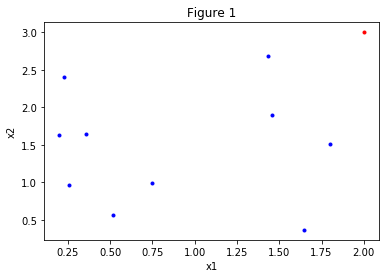

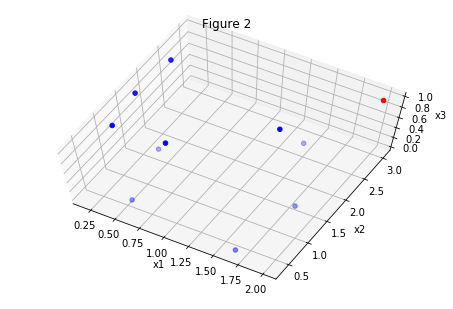

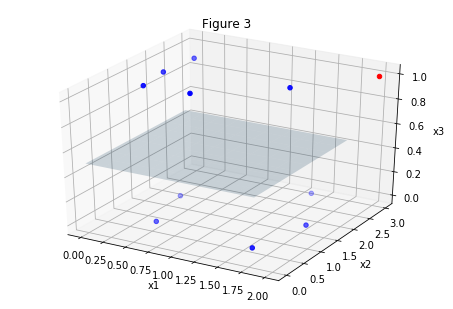

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 10
x1 = np.random.uniform(0, 2, N)
x2 = np.random.uniform(0, 3, N)

plt.figure()
plt.plot(x1, x2, '.b')
plt.plot(2,3,'.r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Figure 1')
plt.show()

# What if we add a feature?
x3 = np.hstack((np.zeros(N/2), np.ones(N/2)))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, x2, x3, c='b')
ax.scatter(2,3,1,c='r')  # Plot a red point for reference
# Plot a surface
# p = fig.gca()
# X, Y = np.meshgrid(np.arange(0, 1, 0.1) * 2, np.arange(0, 1, 0.1) * 3)
# p.plot_surface(X, Y, np.ones((N,N)) * 0.5, alpha=0.2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Figure 2')
# ax.azim = 80
ax.elev = 70
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, x2, x3, c='b')
ax.scatter(2,3,1,c='r')
# Plot a surface
p = fig.gca()
X, Y = np.meshgrid(np.arange(0, 1, 0.1) * 2, np.arange(0, 1, 0.1) * 3)
p.plot_surface(X, Y, np.ones((N,N)) * 0.5, alpha=0.2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Figure 3')
# ax.azim = 80
ax.elev = 30
plt.show()

The same set of points is plotted in the figures above. In figure 1 we are looking at the dataset "from above". Figures 2 and 3 are the "tilted" version of figure 1, but we have added a feature, the third dimension. Now it's easy to classify points, look there is even a plane clearly dividing the set in two!

Is this the solution to all our classification problems? No unfortunately. If we add too many dimensions, we seriously risk to **overfit** our data.

## Down to Business
As mentioned, support vector machines (SVMs) allow us to solve classification problems (as well as regression problems in fact). If we have a set of points, and two labels , for example **0** and **1** (or **good**, **bad**), we want to label the next observed point as being a **0** or a **1**.

Linear SVMs separate the input data by finding an hyperplane between them such that the orthogonal distance between the plane and the closest point is maximized. Almost like in figure 3 above, but better, in an optimal, algorithmic way. Non Linear SVMs find non linear boundaries to separate subsets of points into classes (our labels).

The problem of finding such hyperplane (or hypersurface in the non linear case) in an optimal way can be solved by optimization methods. One possibility is to fomalize the optimization as <a target='_blank' href='https://en.wikipedia.org/wiki/Quadratic_programming'>quadratic problem</a>. This is perhaps the core of the SVM machinery, but it's also a whole chapter in itself. Discussing such algorithms would take us very far, so we defer the discussion (hopefully) to future posts. 

To recap, the main ingredients that we need are the labeled dataset to train the SVM, a kernel and an optimization method. We can use well established python modules for our SVMs. 

### An Example 

Coming Soon!

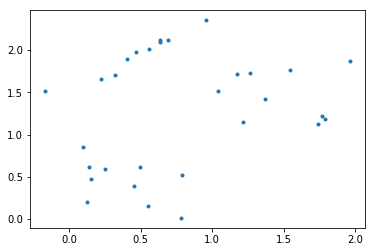

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt


# generate the labels 1 and 0
samp = np.ones(30)
samp[:15] = 0
random.shuffle(samp)

# generate some data
set1 = np.random.random((10, 2))+1
set2 = np.random.random((10, 2))
x = np.hstack((set1[:,0], set2[:,0], set2[:,1]+np.random.normal(0,0.1,10)))
y = np.hstack((set1[:,1], set2[:,1], set2[:,1]+1.5))

plt.plot(x, y, '.')
plt.show()

dataset = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))

###### (Author: Gabriele Costanza)